In [3]:
#Import library
import numpy as np
import pandas as pd

In [4]:
# read the spam.csv file into a DataFrame
df = pd.read_csv("data\spam.csv", encoding='ISO-8859-1')

In [5]:
# lets see 5 random rows from the data
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4349,ham,Yes. Rent is very expensive so its the way we ...,NaN,NaN,NaN
4944,ham,Anyway I don't think I can secure anything up ...,NaN,NaN,NaN
3412,ham,Where do you need to go to get it?,NaN,NaN,NaN
3903,spam,Your 2004 account for 07XXXXXXXXX shows 786 un...,NaN,NaN,NaN
4972,ham,Oops I was in the shower when u called. Hey a ...,NaN,NaN,NaN


In [5]:
# check how many rows and columns are in the DataFrame
df.shape

(5572, 5)

# Data Cleaning

In [6]:
# get a quick summary of the DataFrame (column types, non-null counts, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop the empty/unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
# lets see 5 random rows from the dataset to quickly inspect the data
df.sample(5)

,v1,v2
5383,ham,Good day to You too.Pray for me.Remove the tee...
178,ham,Text her. If she doesnt reply let me know so i...
2640,ham,Pandy joined 4w technologies today.he got job..
4643,ham,Did u got that persons story
3371,ham,And now electricity just went out fml.


In [9]:
#renaming the cols
df.rename(columns={'v1':'target','v2' : 'text'},inplace=True)
df.sample(5)

,target,text
1520,spam,"URGENT! Your Mobile No was awarded a å£2,000 B..."
1471,ham,Oh. U must have taken your REAL Valentine out ...
5076,ham,"Guy, no flash me now. If you go call me, call ..."
1048,ham,I walked an hour 2 c u! doesnåÕt that show I c...
3120,ham,Small problem in auction:)punj now asking tiwary


In [10]:
# import LabelEncoder to convert labels (e.g., spam/ham) into numeric values
from sklearn.preprocessing import LabelEncoder

# create an instance of the encoder
encoder = LabelEncoder()

In [11]:
# encode the text labels (ham/spam) into 0 and 1, and store them in a new 'target' column
df['target'] = encoder.fit_transform(df['target'])

In [12]:
# display the first 5 rows to confirm the changes
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check for any missing values in the dataset
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
#remove duplicates
df= df.drop_duplicates(keep='first')

In [16]:
#verify if there is any duplicate values
df.duplicated().sum()

np.int64(0)

In [17]:
# check the shape again to confirm the final number of rows and columns
df.shape

(5169, 2)

# EDA

In [18]:
# preview the first 5 rows again to see the cleaned and updated data
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# check how many spam and ham messages we have
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

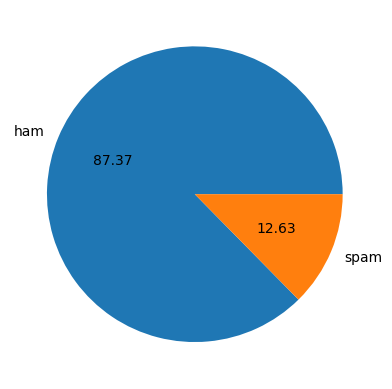

In [20]:
# import matplotlib to create visualizations
import matplotlib.pyplot as plt

# plot a pie chart showing the proportion of ham vs spam messages
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%.2f")
plt.show()

In [21]:
#data is imbalance

In [22]:
# import nltk and download the punkt tokenizer (used for splitting text into words/sentences)
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ATW\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# create a new column to store the number of characters in each message
df['num_characters'] = df['text'].apply(len)

In [24]:
# preview the first 5 rows to see the new 'num_characters' column
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# add a new column for the number of words in each message
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
# check the first 5 rows to see the new 'num_words' column
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# add a new column for the number of sentences in each message
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
# preview the first 5 rows to check all the new features added
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# get summary statistics for character, word, and sentence counts
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# get summary stats for ham messages only
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# get summary stats for spam messages only
df[df['target']== 1 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
# import seaborn for data visualization
import seaborn as sns

In [33]:
# plt.figure(figsize=(3, 2))

<Axes: xlabel='num_characters', ylabel='Count'>

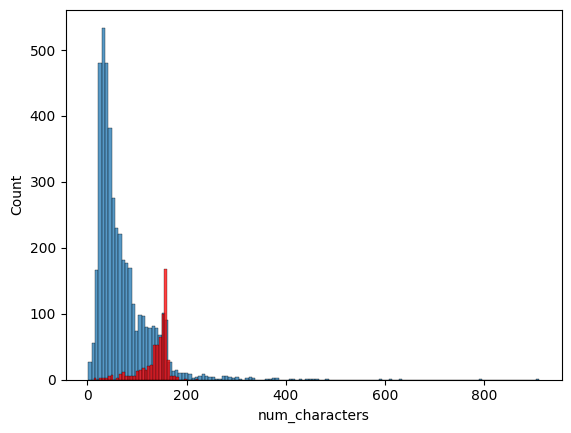

In [34]:
# plot a histogram of message lengths (in characters) for ham messages
sns.histplot(df[df['target'] == 0]['num_characters'])

# overlay the same for spam messages in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

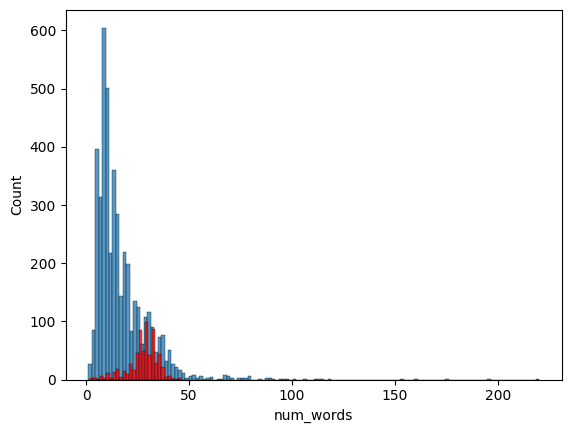

In [35]:
# plot a histogram of word counts for ham messages
sns.histplot(df[df['target'] == 0]['num_words'])

# overlay the same for spam messages in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

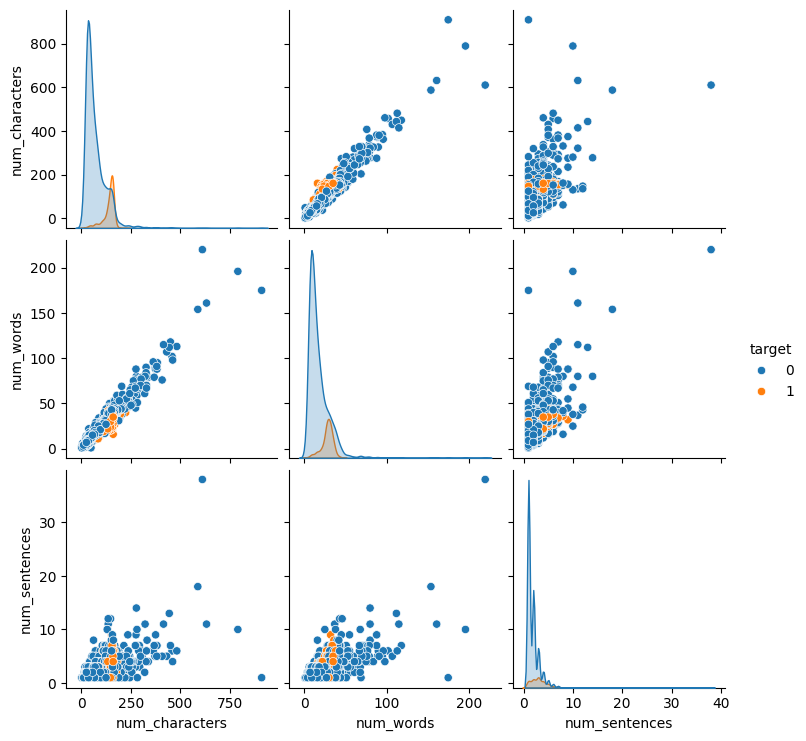

In [36]:
# create pairwise scatter plots to visualize relationships between features, colored by target (ham/spam)
sns.pairplot(df, hue='target')

-Ham messages are more frequent than spam, indicating class imbalance.

-Spam messages tend to be shorter in terms of characters, words, and sentences.

-There is a strong correlation between:

    num_characters and num_words

    num_words and num_sentences

-Spam and ham distributions overlap, so these features alone may not fully separate the classes.

-These structural features are useful for basic pattern detection, but text-based features (like TF-IDF) will likely improve model performance.

In [37]:
# df = df.drop('text', axis=1)

<Axes: >

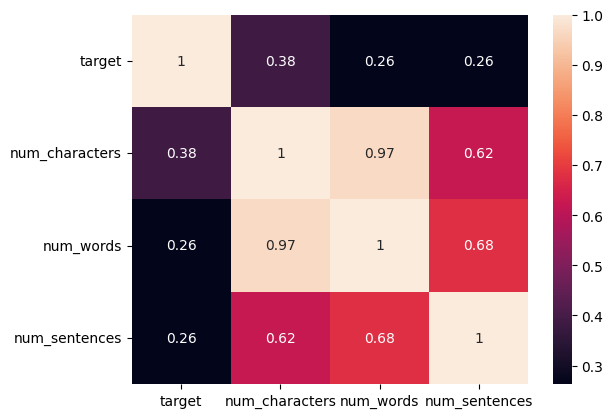

In [38]:
# plot a heatmap to show correlation between numeric features
sns.heatmap(df.corr(numeric_only=True), annot=True)

There is high correlation between num_words and num_characters

# Data preprocessing

In [39]:
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#stemming

In [40]:
# download the list of English stopwords (common words to remove from text)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ATW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
# import string module and check all punctuation characters (to remove them later from text)
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
# function to clean and preprocess the text
def transform_text(text):
    # convert to lowercase
    text = text.lower()
    
    # tokenize the text
    text = nltk.word_tokenize(text)

    y = []
    
    # remove punctuation and keep only alphanumeric words
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # apply stemming
    for i in text:
        y.append(ps.stem(i))

    # join the words back into a single string
    return " ".join(y)

In [43]:
# import PorterStemmer for reducing words to their root form (e.g., dancing → danc)
from nltk.stem.porter import PorterStemmer

# create a stemmer object
ps = PorterStemmer()

# example: stem the word 'dancing'
ps.stem('dancing')

'danc'

In [44]:
# import the list of common English stopwords to filter out during text cleaning
from nltk.corpus import stopwords

In [45]:
transform_text('did you likes my presentation on ML?')

'like present ml'

In [46]:
# apply the text transformation function to each message and store the cleaned version
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
# preview the first 5 rows to see the new 'transformed_text' column
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
# import WordCloud for visualizing the most frequent words
from wordcloud import WordCloud

# create a WordCloud object with custom dimensions and styling
wc = WordCloud(width=50, height=500, min_font_size=100, background_color='white')

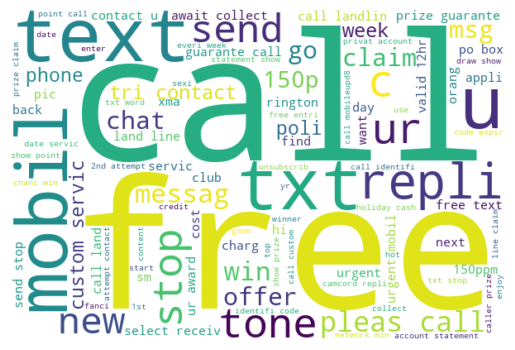

In [49]:
# import WordCloud for visualizing most frequent words in spam messages
from wordcloud import WordCloud

# create a WordCloud object with proper size and styling
wc = WordCloud(width=600, height=400, min_font_size=10, background_color='white')

# combine all transformed spam messages into a single string
spam_text = df.loc[df['target'] == 1, 'transformed_text'].str.cat(sep=' ')

# generate word cloud from spam text
spam_wc = wc.generate(spam_text)

# display the word cloud
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

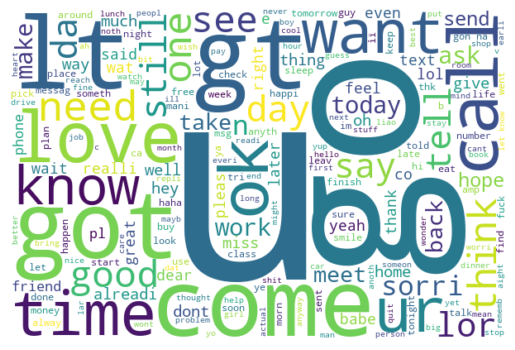

In [50]:
# generate word cloud for ham (non-spam) messages

# combine all transformed ham messages into a single string
ham_text = df.loc[df['target'] == 0, 'transformed_text'].str.cat(sep=' ')

# generate word cloud from ham text
ham_wc = wc.generate(ham_text)

# display the word cloud
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
# create a list to store all words from spam messages
spam_corpus = []

# loop through each spam message
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    # split message into words and add them to the corpus
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
# check how many total words are in the spam corpus
len(spam_corpus)

9939

In [53]:
# import Counter to count word frequencies
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

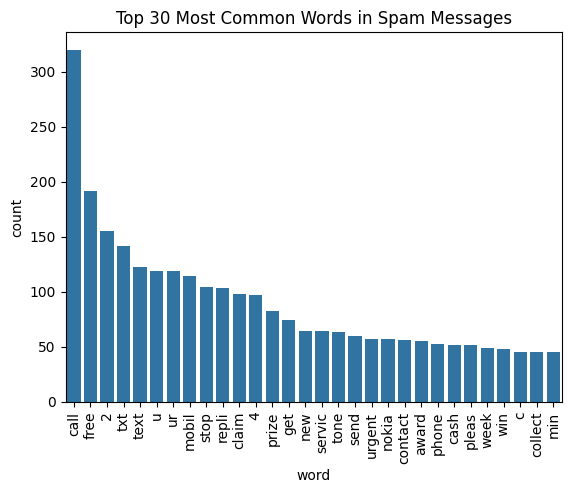

In [54]:

# Get top 30 most common words
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot

sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

In [55]:
# create a list to store all words from ham messages
ham_corpus = []

# loop through each ham message
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    # split message into words and add them to the corpus
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
# check how many total words are in the ham corpus
len(ham_corpus)

35404

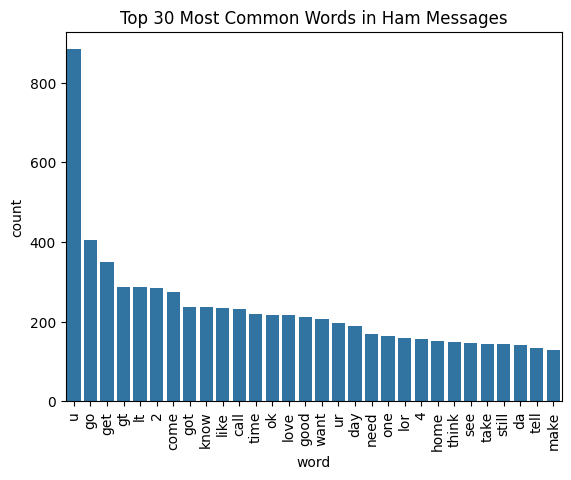

In [57]:
# Get top 30 most common words
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot

sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Messages")
plt.show()

# Model Building

text to vector - bag of words,tfidf,word to vec

In [ ]:
#Text Vectorization
#using Bag of words

In [58]:
# import tools to convert text into numerical feature vectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# initialize Bag of Words vectorizer
cv = CountVectorizer()

# initialize TF-IDF vectorizer with a limit of 3000 most frequent words
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
# convert the transformed text into TF-IDF feature vectors
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [489]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
#appending the num_character coloum to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
# check the shape of the TF-IDF feature matrix (rows = messages, columns = features)
X.shape

(5169, 3000)

In [60]:
# extract the target labels as a NumPy array
y = df['target'].values

In [61]:
# display the target labels
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [62]:
# import function to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [63]:
# split the dataset into training and testing sets (80% train, 20% test)
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2 , random_state=2)

In [64]:
# import different Naive Bayes classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# import evaluation metrics to assess model performance
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [65]:
# create a Gaussian Naive Bayes model (not ideal for sparse text data, but included for comparison)
gnb = GaussianNB()

# create a Multinomial Naive Bayes model (most commonly used for text classification)
mnb = MultinomialNB()

# create a Bernoulli Naive Bayes model (good for binary features, like presence/absence of words)
bnb = BernoulliNB()

In [66]:
# train the Gaussian Naive Bayes model
gnb.fit(X_train, y_train)

# make predictions on the test set
y_pred1 = gnb.predict(X_test)

# evaluate the model
print(accuracy_score(y_test, y_pred1))        # overall accuracy
print(confusion_matrix(y_test, y_pred1))      # true vs predicted labels
print(precision_score(y_test, y_pred1))       # precision: how many predicted spams were correct

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [67]:
# train the Multinomial Naive Bayes model
mnb.fit(X_train, y_train)

# make predictions on the test set
y_pred2 = mnb.predict(X_test)

# evaluate the model
print(accuracy_score(y_test, y_pred2))        # overall accuracy
print(confusion_matrix(y_test, y_pred2))      # confusion matrix
print(precision_score(y_test, y_pred2))       # precision score

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [68]:
# train the Bernoulli Naive Bayes model
bnb.fit(X_train, y_train)

# make predictions on the test set
y_pred3 = bnb.predict(X_test)

# evaluate the model
print(accuracy_score(y_test, y_pred3))        # overall accuracy
print(confusion_matrix(y_test, y_pred3))      # confusion matrix
print(precision_score(y_test, y_pred3))       # precision score

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


tfidf->mnb

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 ,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
# dictionary of all classifiers for easy looping and comparison
clfs = {
    'SVC': svc, 
    'KN': knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [72]:
# function to train a model and return its accuracy and precision
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)                      # train the model
    y_pred = clf.predict(X_test)                   # make predictions on test set
    accuracy = accuracy_score(y_test, y_pred)      # calculate accuracy
    precision = precision_score(y_test, y_pred)    # calculate precision

    return accuracy, precision

In [73]:
# evaluate the SVC model
train_classifier(svc , X_train , y_train , X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [74]:
# lists to store accuracy and precision for each model
accuracy_scores = []
precision_scores = []

# loop through each classifier in the dictionary
for name,clf in clfs.items():
     # train the model and get its accuracy & precision
    current_accuracy , current_precision = train_classifier(clf , X_train , y_train , X_test, y_test)

     # print model name and its scores
    print('For',name)
    print('Accuracy - ',current_accuracy)
    print('precision - ',current_precision)

    # store the results for later use
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
precision -  1.0
For NB
Accuracy -  0.9709864603481625
precision -  1.0
For DT
Accuracy -  0.9313346228239845
precision -  0.8383838383838383
For LR
Accuracy -  0.9555125725338491
precision -  0.96
For RF
Accuracy -  0.9738878143133463
precision -  0.9826086956521739
For AdaBoost
Accuracy -  0.9216634429400387
precision -  0.8202247191011236
For BgC
Accuracy -  0.9584139264990329
precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
precision -  0.9745762711864406
For GBDT
Accuracy -  0.9506769825918762
precision -  0.9306930693069307
For xgb
Accuracy -  0.9680851063829787
precision -  0.9487179487179487


In [ ]:
# create a DataFrame to compare models and sort by Precision (highest first)
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [440]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.974855,0.951613
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909


In [ ]:
# reshape the DataFrame to long format for easier plotting
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.974855
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


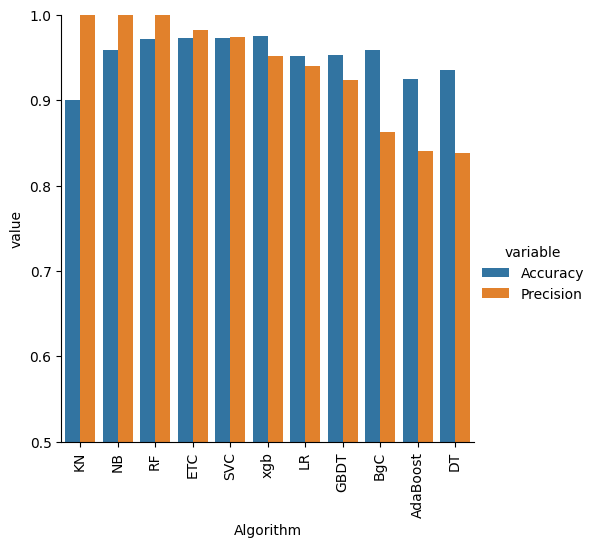

In [ ]:
# grouped bar plot to compare accuracy and precision of each model
sns.catplot(x='Algorithm', y='value', 
            hue='variable', data=performance_df1, kind='bar', height=5)

plt.ylim(0.5, 1.0)  # set y-axis range to better highlight differences
plt.xticks(rotation='vertical')  # rotate x labels for better readability
plt.show()

In [ ]:
#model improve
#1.Change the max_features parameter of TfIdf


In [ ]:
# store and sort the accuracy & precision scores (with max_features=3000) for comparison
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
# merge both performance DataFrames to compare default vs max_features=3000 side by side
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
# store and sort accuracy & precision scores after scaling features
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
# merge previous comparison DataFrame with the scaling results
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
# store and sort accuracy & precision after adding num_characters as a feature
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
# merge the final feature comparison (with num_characters) into the consolidated results
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.932302,0.814815
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.940039,1.000000
2,RF,0.971954,1.000000,0.973888,0.982609,0.973888,0.982609,0.972921,0.982456
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.980658,0.983607
4,SVC,0.972921,0.974138,0.975822,0.974790,0.970019,0.942149,0.866538,0.000000
5,xgb,0.974855,0.951613,0.968085,0.948718,0.968085,0.948718,0.971954,0.943089
6,LR,0.951644,0.940000,0.955513,0.960000,0.967118,0.964286,0.959381,0.952830
7,GBDT,0.952611,0.923810,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.960348,0.864662
9,AdaBoost,0.924565,0.840909,0.921663,0.820225,0.921663,0.820225,0.944874,0.893204


In [486]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.973888,0.982609,0.973888,0.982609
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.970019,0.942149
5,xgb,0.974855,0.951613,0.968085,0.948718,0.968085,0.948718
6,LR,0.951644,0.940000,0.955513,0.960000,0.967118,0.964286
7,GBDT,0.952611,0.923810,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.840909,0.921663,0.820225,0.921663,0.820225


In [462]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.973888,0.982609
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,xgb,0.974855,0.951613,0.968085,0.948718
6,LR,0.951644,0.940000,0.955513,0.960000
7,GBDT,0.952611,0.923810,0.950677,0.930693
8,BgC,0.958414,0.862595,0.958414,0.868217
9,AdaBoost,0.924565,0.840909,0.921663,0.820225


In [463]:
temp_df.head()

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576


In [75]:
#Voting Classifier
svc = SVC(kernel='sigmoid',gamma=1.0 ,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)

In [76]:
# create a soft voting ensemble using SVM, Naive Bayes, and Extra Trees
from sklearn.ensemble import VotingClassifier
voting =  VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [77]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [78]:
# Testing the voting classifier's performance on the test set
# Will print the overall accuracy and how precise it is with spam detection
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [79]:
#Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [80]:
from sklearn.ensemble import StackingClassifier

In [81]:
# Building the Stacking Classifier
# It combines predictions from base models (estimators) and uses a meta model (final_estimator) to improve performance
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [82]:
# Training the stacking model and checking how well it performs on the test set
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [ ]:
# Saving the TF-IDF vectorizer and the trained model using pickle
# These can be loaded later for making predictions on new data
import pickle
pickle.dump(tfidf,open('artifacts/vectorizer.pkl','wb'))
pickle.dump(mnb,open('artifacts/model.pkl','wb'))

Summary: 
The Voting Classifier slightly outperforms the Stacking Classifier, especially in terms of precision (0.9834 vs. 0.9393), making it more reliable for spam detection. Although both models have very high accuracy (~97.9%), the voting model is safer for avoiding false positives.